In [105]:
import pandas as pd

data = pd.read_csv('raw_data.csv')

In [106]:
print(data.iloc[:10,[0,1,2,3]])

         r%  time (years)  notional ($)       PV($)
0  0.007600      0.005348    483.449183  483.429607
1  0.030114      0.015072    712.712067  712.393427
2  0.020456      0.026282     13.275573   13.268510
3  0.009520      0.027672   -368.781503 -368.684826
4  0.072450      0.030814    112.817616  112.574722
5  0.075454      0.034572    418.347914  417.297139
6  0.006253      0.075516    380.387921  380.208902
7  0.055668      0.078473     23.554652   23.454730
8  0.032270      0.080739   -159.885545 -159.476072
9  0.066848      0.080996   -114.608620 -114.009515


In [182]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
r%,1043.0,0.053129,0.025732,0.000464,0.034167,0.051660,0.072879,0.153536
time (years),1043.0,3.284062,2.174226,0.005348,1.580209,2.948344,4.626730,12.539319
notional ($),1043.0,118.998975,506.098547,-1610.072708,-228.025952,108.710728,455.045592,1964.086626
PV($),1043.0,97.909646,435.896655,-1592.842134,-195.890690,92.433204,387.835737,1763.828859


In [108]:
data.shape

(1043, 4)

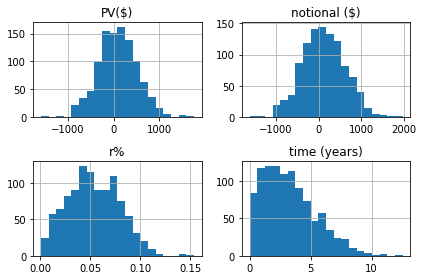

In [109]:
import matplotlib.pyplot as plt

rdata=data.iloc[0:,[0]]
tdata=data.iloc[0:,[1]]
ndata=data.iloc[0:,[2]]
pvdata=data.iloc[0:,[3]]

data.hist(bins=20)

plt.grid(True)
plt.tight_layout()
plt.show()

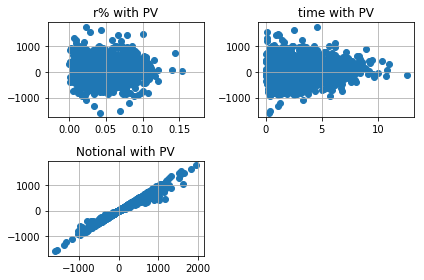

In [110]:
import matplotlib.pyplot as plt

rdata=data.iloc[0:,[0]]
tdata=data.iloc[0:,[1]]
ndata=data.iloc[0:,[2]]
pvdata=data.iloc[0:,[3]]

#pvdata.hist(bins=20)
plt.subplot(2,2,1)
plt.grid(True)
plt.title('r% with PV')
plt.scatter(rdata,pvdata)


plt.subplot(2,2,2)
plt.grid(True)
plt.title('time with PV')
plt.scatter(tdata,pvdata)

plt.subplot(2,2,3)
plt.grid(True)
plt.title('Notional with PV')
plt.scatter(ndata,pvdata)


plt.tight_layout()
plt.show()

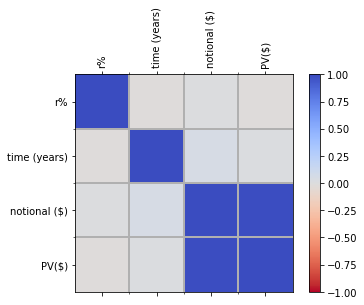

In [111]:
import matplotlib.pyplot as plt
import numpy as np

corr=data.corr()

ax = plt.subplot(1,1,1)
cax=ax.matshow(corr,cmap='coolwarm_r',vmin=-1,vmax=1)
#cax=ax.matshow(corr,cmap='coolwarm',vmin=-1,vmax=1)

plt.colorbar(cax)

plt.xticks(rotation=90)

ticks=np.arange(0,len(data.columns),1)
ticks_minor = np.arange(0,len(data.columns)-1,1)

ax.set_xticks(ticks)
ax.set_xticks(ticks_minor+0.5,minor=True)

ax.set_yticks(ticks)
ax.set_yticks(ticks_minor+0.5,minor=True)

ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)

plt.grid(which='minor', linestyle='-', lw=2)

plt.show()

In [112]:

X = data.drop('PV($)',axis=1)
y = data['PV($)']


In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# print(X_test[166])

In [157]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(10,10),max_iter=5000,verbose=True,tol=0.000001)

In [158]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 100649.42171251
Iteration 2, loss = 100630.12233383
Iteration 3, loss = 100612.74599523
Iteration 4, loss = 100593.14539299
Iteration 5, loss = 100574.87444418
Iteration 6, loss = 100556.53201609
Iteration 7, loss = 100537.28063496
Iteration 8, loss = 100518.56670350
Iteration 9, loss = 100499.44745827
Iteration 10, loss = 100479.67835551
Iteration 11, loss = 100460.57394952
Iteration 12, loss = 100439.42295645
Iteration 13, loss = 100419.33016342
Iteration 14, loss = 100398.23516938
Iteration 15, loss = 100376.67362640
Iteration 16, loss = 100354.26439346
Iteration 17, loss = 100331.39361338
Iteration 18, loss = 100308.15998700
Iteration 19, loss = 100283.95097939
Iteration 20, loss = 100258.51215343
Iteration 21, loss = 100233.10430301
Iteration 22, loss = 100205.79752536
Iteration 23, loss = 100178.38560174
Iteration 24, loss = 100149.23526943
Iteration 25, loss = 100119.09297419
Iteration 26, loss = 100087.40890460
Iteration 27, loss = 100055.52756546
Iteration 

Iteration 294, loss = 8595.66645828
Iteration 295, loss = 8424.61219426
Iteration 296, loss = 8265.46118476
Iteration 297, loss = 8109.84330444
Iteration 298, loss = 7957.82178618
Iteration 299, loss = 7810.39750912
Iteration 300, loss = 7667.05184594
Iteration 301, loss = 7518.41408809
Iteration 302, loss = 7380.76386473
Iteration 303, loss = 7245.74562096
Iteration 304, loss = 7114.16758696
Iteration 305, loss = 6983.48132868
Iteration 306, loss = 6859.76614050
Iteration 307, loss = 6733.45445977
Iteration 308, loss = 6612.68308833
Iteration 309, loss = 6494.62341846
Iteration 310, loss = 6377.61618332
Iteration 311, loss = 6264.24764489
Iteration 312, loss = 6152.02639410
Iteration 313, loss = 6044.04490683
Iteration 314, loss = 5938.79038707
Iteration 315, loss = 5839.91956959
Iteration 316, loss = 5737.18878036
Iteration 317, loss = 5640.52305667
Iteration 318, loss = 5541.20646637
Iteration 319, loss = 5449.64389686
Iteration 320, loss = 5359.38165722
Iteration 321, loss = 5270.0

Iteration 594, loss = 1304.19688907
Iteration 595, loss = 1302.44117280
Iteration 596, loss = 1301.14296559
Iteration 597, loss = 1299.88882621
Iteration 598, loss = 1298.84477037
Iteration 599, loss = 1297.63106846
Iteration 600, loss = 1295.68959920
Iteration 601, loss = 1294.13645256
Iteration 602, loss = 1292.62527736
Iteration 603, loss = 1291.40051166
Iteration 604, loss = 1289.92790641
Iteration 605, loss = 1288.75824626
Iteration 606, loss = 1287.14598431
Iteration 607, loss = 1285.82140000
Iteration 608, loss = 1284.58434029
Iteration 609, loss = 1283.04267181
Iteration 610, loss = 1281.70573881
Iteration 611, loss = 1280.27527691
Iteration 612, loss = 1279.23122136
Iteration 613, loss = 1277.53500333
Iteration 614, loss = 1276.37590726
Iteration 615, loss = 1274.91829145
Iteration 616, loss = 1273.56119366
Iteration 617, loss = 1272.22162762
Iteration 618, loss = 1270.71570030
Iteration 619, loss = 1269.38607714
Iteration 620, loss = 1268.03681717
Iteration 621, loss = 1266.8

Iteration 875, loss = 938.12806983
Iteration 876, loss = 937.25523088
Iteration 877, loss = 935.59634909
Iteration 878, loss = 934.55865059
Iteration 879, loss = 933.48721452
Iteration 880, loss = 931.92527943
Iteration 881, loss = 930.68709262
Iteration 882, loss = 929.62562487
Iteration 883, loss = 928.18847645
Iteration 884, loss = 927.02033134
Iteration 885, loss = 925.88862927
Iteration 886, loss = 924.41708418
Iteration 887, loss = 923.29744392
Iteration 888, loss = 922.18815404
Iteration 889, loss = 920.81937823
Iteration 890, loss = 919.48941556
Iteration 891, loss = 918.26406549
Iteration 892, loss = 917.23192590
Iteration 893, loss = 915.93738040
Iteration 894, loss = 914.77259981
Iteration 895, loss = 913.51896163
Iteration 896, loss = 912.36576717
Iteration 897, loss = 911.27033518
Iteration 898, loss = 909.74497441
Iteration 899, loss = 908.97919777
Iteration 900, loss = 907.38875302
Iteration 901, loss = 906.07250119
Iteration 902, loss = 904.81389818
Iteration 903, loss 

Iteration 1170, loss = 545.30708937
Iteration 1171, loss = 543.92908317
Iteration 1172, loss = 542.67965174
Iteration 1173, loss = 541.48455064
Iteration 1174, loss = 540.38512089
Iteration 1175, loss = 539.26200946
Iteration 1176, loss = 537.93877993
Iteration 1177, loss = 537.00721699
Iteration 1178, loss = 535.52984749
Iteration 1179, loss = 534.39858103
Iteration 1180, loss = 533.20200051
Iteration 1181, loss = 531.83418870
Iteration 1182, loss = 530.79980899
Iteration 1183, loss = 529.41714114
Iteration 1184, loss = 528.34851494
Iteration 1185, loss = 527.08885080
Iteration 1186, loss = 525.74696261
Iteration 1187, loss = 524.78261538
Iteration 1188, loss = 523.48812869
Iteration 1189, loss = 522.29759997
Iteration 1190, loss = 521.02703673
Iteration 1191, loss = 519.72372917
Iteration 1192, loss = 518.88295834
Iteration 1193, loss = 517.64460135
Iteration 1194, loss = 516.07160085
Iteration 1195, loss = 515.00285368
Iteration 1196, loss = 513.64949343
Iteration 1197, loss = 512.7

Iteration 1460, loss = 272.20194976
Iteration 1461, loss = 271.63175671
Iteration 1462, loss = 270.81071610
Iteration 1463, loss = 270.22825563
Iteration 1464, loss = 269.64846468
Iteration 1465, loss = 269.11720498
Iteration 1466, loss = 268.24267104
Iteration 1467, loss = 267.56297000
Iteration 1468, loss = 266.96315001
Iteration 1469, loss = 266.23187782
Iteration 1470, loss = 265.66030687
Iteration 1471, loss = 264.99559595
Iteration 1472, loss = 264.39942035
Iteration 1473, loss = 263.69969484
Iteration 1474, loss = 263.02017568
Iteration 1475, loss = 262.48853970
Iteration 1476, loss = 261.80034510
Iteration 1477, loss = 261.26665835
Iteration 1478, loss = 260.79718842
Iteration 1479, loss = 259.86563928
Iteration 1480, loss = 259.37128498
Iteration 1481, loss = 258.86830225
Iteration 1482, loss = 258.13090240
Iteration 1483, loss = 257.56502027
Iteration 1484, loss = 257.11656284
Iteration 1485, loss = 256.41339429
Iteration 1486, loss = 255.77661832
Iteration 1487, loss = 255.5

Iteration 1736, loss = 176.31967163
Iteration 1737, loss = 176.43390457
Iteration 1738, loss = 176.03069449
Iteration 1739, loss = 175.91909295
Iteration 1740, loss = 175.82460898
Iteration 1741, loss = 175.84512767
Iteration 1742, loss = 175.67067774
Iteration 1743, loss = 175.43452896
Iteration 1744, loss = 175.60923403
Iteration 1745, loss = 175.30052562
Iteration 1746, loss = 175.27051586
Iteration 1747, loss = 174.89320242
Iteration 1748, loss = 174.82212619
Iteration 1749, loss = 174.74012293
Iteration 1750, loss = 174.64342845
Iteration 1751, loss = 174.37810690
Iteration 1752, loss = 174.35667015
Iteration 1753, loss = 174.21310970
Iteration 1754, loss = 174.06024687
Iteration 1755, loss = 173.93050445
Iteration 1756, loss = 173.82770097
Iteration 1757, loss = 173.77165954
Iteration 1758, loss = 173.70702256
Iteration 1759, loss = 173.60514411
Iteration 1760, loss = 173.42440069
Iteration 1761, loss = 173.27009881
Iteration 1762, loss = 173.19869619
Iteration 1763, loss = 172.9

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-06, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [159]:
predictions = mlp.predict(X_test)

In [161]:
diff_predict = ((predictions-y_test)/y_test)
diff_predict.describe().transpose()

count    261.000000
mean      -0.001494
std        0.263990
min       -2.560256
25%       -0.023226
50%        0.011977
75%        0.039946
max        1.501138
Name: PV($), dtype: float64

In [166]:
import pandas as pd

out_data = pd.DataFrame([predictions,y_test,(predictions-y_test)/y_test],).T
out_data.columns=['predictions','y_test','diff_predict']
print(out_data[:10])

#data output
out_data.to_csv('out_data.csv')

   predictions      y_test  diff_predict
0    65.477334   49.528981      0.322000
1   -14.192080  -46.959358     -0.697780
2   151.717516  147.643137      0.027596
3  -848.707673 -889.339232     -0.045687
4    99.481832   90.655051      0.097367
5   868.160705  849.162954      0.022372
6   368.994165  356.513567      0.035007
7   399.595053  417.297139     -0.042421
8    91.218622   95.984687     -0.049654
9  -757.439520 -800.267985     -0.053518


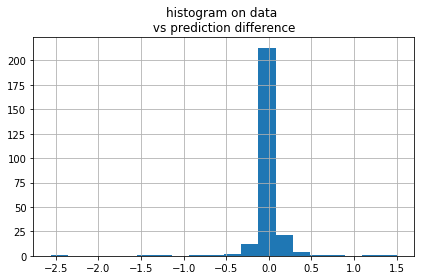

In [167]:
import matplotlib.pyplot as plt
import numpy as np

pout_data=out_data.iloc[0:,[0]]
tout_data=out_data.iloc[0:,[1]]
dout_data=out_data.iloc[0:,[2]]

dout_data.hist(bins=20)

plt.grid(True)
plt.title('histogram on data \n vs prediction difference ')
plt.tight_layout()
plt.show()

In [216]:
#calculadora!

# 166 0.17622841  1.48874869 -0.2638513

# price_me = scaler.transform([[5/100,2,100]])
price_me = scaler.transform([[0.17622841,1.48874869,-0.2638513]])

calc_me = np.asscalar(mlp.predict(price_me))
print(calc_me)

-39.22750286388663


In [271]:

def f(r,t,n):
    price_me = scaler.transform([[r,t,n]])
    calc_me = np.asscalar(mlp.predict(price_me).reshape(1,1))
    return calc_me
x=10
print(f(rmean,tmean,x))


-1.8365494646576703


In [424]:
# r= 0.053129
# t =3.284062
# n =118.998975

import matplotlib.pyplot as plt
import numpy as np

rdata=data.iloc[0:,[0]]
tdata=data.iloc[0:,[1]]
ndata=data.iloc[0:,[2]]
pvdata=data.iloc[0:,[3]]

# mean, max, min, std
rmean=np.mean(rdata).values
tmean=np.mean(tdata).values
nmean=np.mean(ndata).values
pvmean=np.mean(pvdata).values
rmax=np.max(rdata).values
tmax=np.max(tdata).values
nmax=np.max(ndata).values
pvmax=np.max(pvdata).values
rmin=np.min(rdata).values
tmin=np.min(tdata).values
nmin=np.min(ndata).values
pvmin=np.min(pvdata).values

print(rmean)

# data.hist(bins=20)

# plt.grid(True)
# plt.tight_layout()
# plt.show()

[0.05312888]


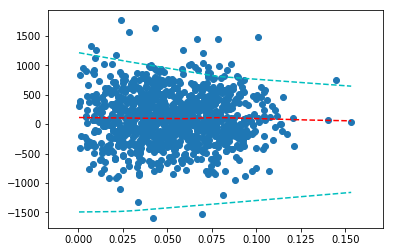

In [429]:
import numpy as np
import matplotlib.pyplot as plt

def f(r,t,n):
    price_me = scaler.transform([[r,t,n]])
    calc_me = np.asscalar(mlp.predict(price_me))
    return calc_me

# np.min(ndata).values
# np.max(ndata).values

plotdata = pd.DataFrame(columns=['xvals', 'yvals','yvals_max','yvals_min'])
plotdata_sel = rdata

j=np.asscalar(np.min(plotdata_sel).values)

rangemin = 0
rangemax = 1000
rangestep = 1

for i in range(rangemin,rangemax,rangestep):
    step = (np.asscalar(np.max(plotdata_sel).values) - np.asscalar(np.min(plotdata_sel).values))*rangestep/(rangemax-rangemin)
    xvals = j
    yvals = f(j,tmean,nmean)
    yvals_max = f(j,tmax,nmax)
    yvals_min = f(j,tmin,nmin)
    plotdata.loc[i] = [xvals,yvals,yvals_max,yvals_min]
    j=j+step
    
#   plt.plot(xvals, yvals)

# print(plotdata)

# xvals = np.arange(0, 1 , 0.1)
# yvals = f(rmean,tmean,xvals)
# yvals = rmean+tmean/(xvals+0.1)

# x=np.arange(0, 1 , 0.1)
plt.scatter(plotdata_sel,pvdata)
plt.plot(plotdata['xvals'],plotdata['yvals'],'r--')
plt.plot(plotdata['xvals'],plotdata['yvals_max'],'c--')
plt.plot(plotdata['xvals'],plotdata['yvals_min'],'c--')
plt.show()

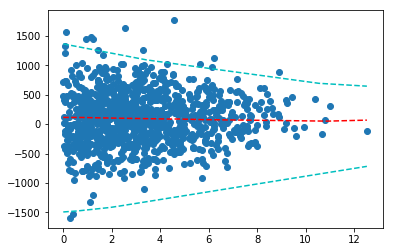

In [428]:
import numpy as np
import matplotlib.pyplot as plt

def f(r,t,n):
    price_me = scaler.transform([[r,t,n]])
    calc_me = np.asscalar(mlp.predict(price_me))
    return calc_me

# np.min(ndata).values
# np.max(ndata).values

plotdata = pd.DataFrame(columns=['xvals', 'yvals','yvals_max','yvals_min'])
plotdata_sel = tdata

j=np.asscalar(np.min(plotdata_sel).values)

rangemin = 0
rangemax = 1000
rangestep = 1

for i in range(rangemin,rangemax,rangestep):
    step = (np.asscalar(np.max(plotdata_sel).values) - np.asscalar(np.min(plotdata_sel).values))*rangestep/(rangemax-rangemin)
    xvals = j
    yvals = f(rmean,j,nmean)
    yvals_max = f(rmax,j,nmax)
    yvals_min = f(rmin,j,nmin)
    plotdata.loc[i] = [xvals,yvals,yvals_max,yvals_min]
    j=j+step
    
#   plt.plot(xvals, yvals)

# print(plotdata)

# xvals = np.arange(0, 1 , 0.1)
# yvals = f(rmean,tmean,xvals)
# yvals = rmean+tmean/(xvals+0.1)

# x=np.arange(0, 1 , 0.1)
plt.scatter(plotdata_sel,pvdata)
plt.plot(plotdata['xvals'],plotdata['yvals'],'r--')
plt.plot(plotdata['xvals'],plotdata['yvals_max'],'c--')
plt.plot(plotdata['xvals'],plotdata['yvals_min'],'c--')
plt.show()

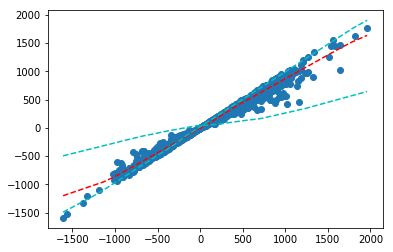

In [430]:
import numpy as np
import matplotlib.pyplot as plt

def f(r,t,n):
    price_me = scaler.transform([[r,t,n]])
    calc_me = np.asscalar(mlp.predict(price_me))
    return calc_me

# np.min(ndata).values
# np.max(ndata).values

plotdata = pd.DataFrame(columns=['xvals', 'yvals','yvals_max','yvals_min'])
plotdata_sel = ndata

j=np.asscalar(np.min(plotdata_sel).values)

rangemin = 0
rangemax = 1000
rangestep = 1

for i in range(rangemin,rangemax,rangestep):
    step = (np.asscalar(np.max(plotdata_sel).values) - np.asscalar(np.min(plotdata_sel).values))*rangestep/(rangemax-rangemin)
    xvals = j
    yvals = f(rmean,tmean,j)
    yvals_max = f(rmax,tmax,j)
    yvals_min = f(rmin,tmin,j)
    plotdata.loc[i] = [xvals,yvals,yvals_max,yvals_min]
    j=j+step
    
#   plt.plot(xvals, yvals)

# print(plotdata)

# xvals = np.arange(0, 1 , 0.1)
# yvals = f(rmean,tmean,xvals)
# yvals = rmean+tmean/(xvals+0.1)

# x=np.arange(0, 1 , 0.1)
plt.scatter(plotdata_sel,pvdata)
plt.plot(plotdata['xvals'],plotdata['yvals'],'r--')
plt.plot(plotdata['xvals'],plotdata['yvals_max'],'c--')
plt.plot(plotdata['xvals'],plotdata['yvals_min'],'c--')
plt.show()